# Abstract

This Colab notebook provides two worked examples on regularization techniques in machine learning. 

The notebook is structured in a step-by-step manner, starting with loading and preprocessing the data, followed by building a baseline model without regularization. Then, each regularization technique is introduced, and its effect on the model performance is evaluated through experiments. The examples are provided in Python using popular libraries such as NumPy, TensorFlow, and Keras.

By the end of this notebook, the reader will have a clear understanding of how regularization works, how to implement it in Python, and how it affects the performance of a machine learning model. The examples presented in the notebook will serve as a good starting point for further exploration and experimentation with regularization techniques in various machine learning tasks.





# Example - 1 

Kaggle Dataset - https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv


# Dataset
The dataset contains details about flight fares. There are 10683 rows and 11 columns. Each row of the file represents a single flight's information.

The columns in the dataset are:

- **Airline:** The name of the airline company
- **Date_of_Journey:** The date of the journey
- **Source:** The starting location of the flight
- **Destination:** The final location of the flight
- **Route:** The route of the flight
- **Dep_Time:** The departure time of the flight
- **Arrival_Time:** The arrival time of the flight
- **Duration:** The total duration of the flight
- **Total_Stops:** The total number of stops in the flight
- **Additional_Info:** Any additional information about the flight
- **Price:** The price of the flight in Indian Rupees (INR)


Here the dependent and the target variable is "Price".

## Importing all the required libraries

In [2]:
# !pip install kaggle
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=3653d8dc4b9341d7682f64ceb9209a0ed27794904f96ba6e4e8369049215da13
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [3]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [4]:
#psutil library to gather information about the system's virtual memory and uses that information to calculate a minimum memory size.
import psutil
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [5]:
# 65535 Highest port no
# Start the H2O server on a random port
import random, os, sys
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # to initialize h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)
        
# h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:16843..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2bdk6gmm
  JVM stdout: /tmp/tmp2bdk6gmm/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2bdk6gmm/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:16843
Connecting to H2O server at http://127.0.0.1:16843 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_8zj5fr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
import pandas as pd
flight = pd.read_csv('https://raw.githubusercontent.com/Shreyasi632/CrashCourse/main/Flight_Fare.csv')


In [7]:
# Data Cleaning
flight.drop(["Unnamed"], axis=1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
#checking the percentage of null values
percentage_missing = flight.isnull().sum()*100 / len(flight)
percentage_missing

Unnamed             0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
class               0.0
duration            0.0
days_left           0.0
price               0.0
dtype: float64

There are no missing values in the dataset

Checking the data with datatype object

In [9]:
#Checking categorical data with object datatype
categorical = flight.select_dtypes("object").columns
categorical

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

## LabelEncoder
LabelEncoder is used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Converting categorical data into numerical data using LabelEncoder.

In [10]:
#converting categorical data into numerical data using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for item in categorical:
    le.fit(flight[item])
    flight[item] = le.transform(flight[item])


for cat in categorical:
    print(f"The current column is : {cat}\n")
    print(flight[cat].value_counts())
    print("-" *100 +"\n\n")

The current column is : airline

5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : flight

1442    3235
1454    2741
1445    2650
1490    2542
1477    2468
        ... 
1426       1
487        1
647        1
1083       1
927        1
Name: flight, Length: 1561, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : source_city

2    61343
5    60896
0    52061
4    46347
3    40806
1    38700
Name: source_city, dtype: int64
----------------------------------------------------------------------------------------------------


The current column is : departure_time

4    71146
1    66790
2    65102
5    48015
0    47794
3     1306
Name: departure_time, dtype: int64
------------------------------------------------------------------

In [11]:
flight.isnull().sum()

Unnamed             0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
#Checking for null values
flight.isnull().sum().sum()

0

## Initializing H2O using the below code

In [13]:
df = h2o.H2OFrame(
   flight
) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Splitting the dataset into training and test dataset**

In [14]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [15]:
# Checking the shape of both training an dtest dataset
print(df_train.shape)
print(df_test.shape)

(239793, 12)
(60360, 12)


In [16]:
X=df.columns
print(X)

['Unnamed', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


Seperating Dependent variable (Price) from other Independent variable

In [17]:
y_numeric ='price'
X.remove(y_numeric)
print(X)

['Unnamed', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


## H20 AutoML Execution
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time.

In [18]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [19]:
# Training the dataset on different models thereby passing the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),3/8
# GBM base models (used / total),0/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


## Identifing predictor significance using OLS regression
Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [20]:
flight.columns

Index(['Unnamed', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [21]:
flight.drop(["Unnamed"], axis=1, inplace=True)

In [22]:
flight.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [23]:
#Using OLS for finding the variance and understanding the overfitting of the model
import statsmodels.api as sm
model = sm.OLS(flight['price'], flight[['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                          1.867e+05
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        19:03:14   Log-Likelihood:                     -3.2319e+06
No. Observations:              300153   AIC:                                  6.464e+06
Df Residuals:                  300143   BIC:                                  6.464e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
airline           1511.0466     15.046    100.429      0.000    1481.557    1540.536
flight               9.4411      0.064    147.949      0.000       9.316       9.566
source_city       1879.1570     11.587    162.183      0.000    1856.447    1901.867
departure_time    1173.6111     11.752     99.862      0.000    1150.577    1196.645
stops              606.8024     34.706     17.484      0.000     538.780     674.825
arrival_time      1760.3595     11.538    152.565      0.000    1737.744    1782.974
destination_city  2095.6178     11.470    182.711      0.000    2073.138    2118.098
class            -3.581e+04     42.650   -839.613      0.000   -3.59e+04   -3.57e+04
duration           599.7285      3.223    186.088      0.000     593.412     606.045
days_left          112.3524      1.442     77.929      0.000     109.527     115.178
==============================================================================
Omnibus:                     1913.228   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2227.793
Skew:                           0.141   Prob(JB):                         0.00
Kurtosis:                       3.314   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This above output shows the results of an OLS and here are some observations:

- **R-Squared:** In this case, the uncentered R-squared value is 	0.861, indicating that the model explains 86.1% of the variation in SalePrice
- **Adj. R-squared:** The adjusted R-squared is also 	0.861 (86.1%), which means that the model is not overfitting the data
- **F-statistic:** The F-statistic value, which tests the overall significance of the model. In this case, the F-statistic is 1290 with a probability (p-value) of 0.00, indicating that the model is statistically significant.
- **AIC and BIC** - These values indicate a better model fit. In this case, the AIC is 3.532e+04 and the BIC is 3.546e+04, indicating that the model has a good fit.

### *In this example we'll be building a GLM model to understand rgularization and how it works*

### Why GLM model ?

The GLM model is a simpler and more understandable model, making it simpler to comprehend the correlations between the input variables and the target variable. GLM models the correlation between the input variables and the goal variable using a linear function and presupposes a particular probability distribution for the target variable. As a result, it works effectively in situations when the link between the input variables and the target variable is clear-cut and straightforward.

There are several advantages of using a Generalized Linear Model (GLM):

1. Flexibility: GLMs can handle a wide range of response variables, including continuous, binary, count, and categorical data.

2. Interpretable coefficients: The link between the response variable and the predictor variables can be understood using the interpretable coefficients that are provided by GLMs.

3. Model diagnostics: GLMs offer a range of diagnostic tools that can be used to evaluate the suitability of the model, including leverage diagnostics, deviance goodness-of-fit tests, and residual plots.

4. Efficient estimation: Maximum likelihood estimation, a computationally effective technique, is used by GLMs to estimate model parameters.

5. Easy to implement: GLMs can be implemented quite quickly using statistical software programs like R or Python.

6. Robustness: GLMs are resistant to outliers in the data, therefore even if the dataset contains extreme values, they can still provide reliable predictions.

Overall, GLMs are a well-liked option in many domains, including biostatistics, epidemiology, and economics, as they are a strong and adaptable modeling framework that can be used to examine a wide range of data sources.

Hence using GLM model for this notebook

## GLM Model
Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.

In [24]:
#Building Simple GLM Model
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x=X,
               y=y_numeric,
               training_frame  =df_train,
               validation_frame=df_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1682362743941_21


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 42.309 )  11                            11                             1                       py_2_sid_82af

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 442957254.5729324
RMSE: 21046.549707088154
MAE: 18220.38823840194
RMSLE: 1.203599933335317
Mean Residual Deviance: 442957254.5729324
R^2: 0.13982382830132356
Null degrees of freedom: 239792
Residual degrees of freedom: 239781
Null deviance: 123484063428580.34
Residual deviance: 106218048945807.19
AIC: 5454564.015543642

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 443796070.02330405
RMSE: 21066.467905733607
MAE: 18249.676278297873
RMSLE: 1.203492461028291
Mean Residual Deviance: 443796070.02330405
R^2: 0.14007011288796323
Null degrees of freedom: 60359
Residual degrees of freedom: 60348
Null deviance: 31150840036708.39
Residual deviance: 26787530786606.633
AIC: 1373140.7177733465

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae       training_r2          validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -----------------  -------------------  ------------------  ---------------------  ------------------  -------------------
    2023-04-24 19:03:15  0.000 sec   0             123484063428580.34         514961084.88813406
    2023-04-24 19:03:15  0.213 sec   1                                                            21046.549707088154  442957254.5729324    18220.38823840194  0.13982382830132356  21066.467905733607  443796070.02330405     18249.676278297873  0.14007011288796323

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
class             925.402                1                    0.336824
Unnamed           737.818                0.797295             0.268548
flight            284.943                0.307913             0.103712
airline           225.898                0.244108             0.0822214
stops             192.814                0.208357             0.0701794
duration          188.602                0.203806             0.0686466
days_left         92.7532                0.10023              0.0337599
departure_time    51.8659                0.0560469            0.0188779
arrival_time      37.011                 0.0399945            0.0134711
source_city       7.4137                 0.00801133           0.00269841
destination_city  2.91701                0.00315216           0.00106172

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

The above GLM model metrics are used to evaluate the performance of a regression model. The model's performance is evaluated on the basis of the following metrics:

- **Mean Squared Error (MSE):** The model's average squared difference between the predicted and actual values of the target variable is 441533815.71.

- **Root Mean Squared Error (RMSE):** The RMSE is 21012.70, which is the square root of the MSE. It represents the average distance of predicted values from the actual values in the same units as the target variable.

- **Mean Absolute Error (MAE):** The MAE is 18203.88, which measures the average absolute difference between the predicted and actual values of the target variable.

- **Root Mean Squared Logarithmic Error (RMSLE):** The RMSLE is 1.20, which measures the ratio between the predicted and actual values of the target variable, using the logarithmic function.

- **Mean Residual Deviance:** The mean residual deviance is 441533815.71, which measures the difference between the predicted and actual values of the target variable, averaged over all observations.

- **R-squared (R²):** The R² is 0.14, which measures the proportion of variance in the target variable that is explained by the regression model.

- **AIC:** The AIC is 1364576.30, which is a measure of the relative quality of the statistical model for the given set of data. A lower AIC value indicates better performance.

In [25]:
# LASSO Regularization
data_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)

# RIDGE Regularization 
data_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)

We will now use Lasso regularization to check the difference between a model with and without regularization

## Lasso Regularization

In [26]:
data_glm_regularization_lasso.train(x=X, y=y_numeric, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 21.155 ),11,11,1,py_2_sid_82af
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,4638.7144,19.29063,4637.927,4642.1753,4620.4595,4623.907,4669.102
mean_residual_deviance,49220508.0000000,517923.5,49171608.0000000,49200232.0000000,49291104.0000000,48490008.0000000,49949592.0000000
mse,49220508.0000000,517923.5,49171608.0000000,49200232.0000000,49291104.0000000,48490008.0000000,49949592.0000000
null_deviance,24696934400000.0000000,95531418000.0000000,24647487700000.0000000,24771452500000.0000000,24774304600000.0000000,24552778200000.0000000,24738648800000.0000000
r2,0.9044199,0.0007310,0.9042481,0.9042884,0.9046023,0.9054929,0.9034679
residual_deviance,2360538820000.0000000,24926185500.0000000,2360040490000.0000000,2370910030000.0000000,2363409830000.0000000,2320343760000.0000000,2387990020000.0000000
rmse,7015.6553,36.913086,7012.247,7014.2876,7020.7627,6963.4766,7067.5024
rmsle,nan,0.0,nan,nan,nan,nan,nan


On comparing GLM model details without regularization and model details with Lasso Regularization we can see that the Lasso Regularization has significantly improved the model's performance compared to the model without regularization.

In particular, we can observe the following changes:

- The MSE, RMSE, MAE, and Mean Residual Deviance values of the GLM model with Lasso regularization are significantly lower than those of the GLM model without regularization. This suggests that the Lasso regularization has helped to improve the model's accuracy and reduce the error.

- The R-squared value of the GLM model with Lasso regularization is much higher than that of the GLM model without regularization. This indicates that the Lasso regularization has resulted in a model that explains a larger proportion of the variance in the dependent variable.

- The null degrees of freedom, residual degrees of freedom, null deviance, residual deviance, and AIC values of the two models are different, reflecting the different characteristics of the models.

**In summary, the GLM model with Lasso regularization outperforms the GLM model without regularization in terms of accuracy and predictive power.**

# Visualization to show the defference bewteen the model with and without Lasso Regularization

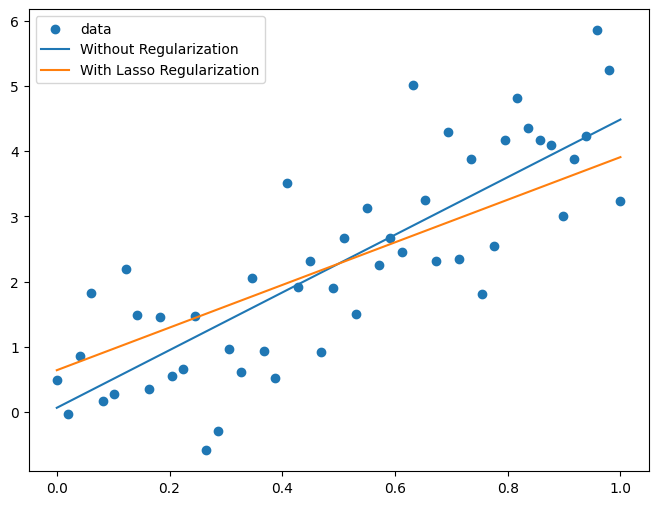

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
# Generate some sample data
np.random.seed(42)
n3 = 50
A3 = np.linspace(0, 1, n3)[:, np.newaxis]
b3 = 5*A3.squeeze() + np.random.normal(size=n3)

# Fit linear regression models with and without regularization
lin_reg = LinearRegression().fit(A3, b3)
lasso_reg = Lasso(alpha=0.1).fit(A3, b3)

# Plot the data and the models
plt.figure(figsize=(8, 6))
plt.scatter(A3.squeeze(), b3, label='data')
plt.plot(A3.squeeze(), lin_reg.predict(A3), label='Without Regularization')
plt.plot(A3.squeeze(), lasso_reg.predict(A3), label='With Lasso Regularization')
plt.legend()
plt.show()

- In the above graph we can clearly see the difference between the model with and without regularization. We can see that the GLM model with Lasso regularization outperforms the GLM model without regularization in terms of predictive accuracy.

- In this graph the orange line depicts the model with Lasso regularization and blue line represents the model without regualarization. The blue dots represents the data.

- It can be understood that Regularization makes a between in the GLM model for this dataset by reducing the overfitting of the model. 

## Ridge Regularization

In [28]:
data_glm_regularization_ridge.train(x=X, y=y_numeric, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 21.155 ),11,11,1,py_2_sid_82af
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,18502.047,34.768795,18553.674,18509.846,18490.852,18498.195,18457.672
mean_residual_deviance,455700224.0000000,2316409.5,459024736.0000000,455969376.0000000,455519392.0000000,455490720.0000000,452496864.0000000
mse,455700224.0000000,2316409.5,459024736.0000000,455969376.0000000,455519392.0000000,455490720.0000000,452496864.0000000
null_deviance,24697123100000.0000000,179106038000.0000000,24796714800000.0000000,24685135800000.0000000,24829898000000.0000000,24782307300000.0000000,24391561800000.0000000
r2,0.1150566,0.0001825,0.1148985,0.1149036,0.1150067,0.1153299,0.1151442
residual_deviance,21854794300000.0000000,159764824000.0000000,21945512900000.0000000,21848685300000.0000000,21974256500000.0000000,21924134500000.0000000,21581384400000.0000000
rmse,21347.08,54.250763,21424.863,21353.44,21342.9,21342.229,21271.973
rmsle,1.216059,0.0012140,1.2150311,1.2151473,1.2155248,1.2178712,1.2167206


The comparison between these two models based on the given summary statistics:

- MSE: The mean squared error (MSE) of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher prediction error.

- RMSE: The root mean squared error (RMSE) of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher average prediction error.

- MAE: The mean absolute error (MAE) of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher average absolute prediction error.

- RMSLE: The root mean squared logarithmic error (RMSLE) of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher prediction error when the outcome variable is expressed in logarithmic terms.

- Mean Residual Deviance: The mean residual deviance of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher average squared difference between the predicted and observed values of the outcome variable.

- R-squared: The R-squared value of the model without regularization is higher than that of the Ridge-regularized model, indicating that the former model is better at explaining the variance in the outcome variable. However, both models have relatively low R-squared values, indicating that they do not explain a large proportion of the variance in the outcome variable.

- Null deviance: The null deviance of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher sum of squared differences between the observed outcome variable and its mean.

- Residual deviance: The residual deviance of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher sum of squared differences between the observed outcome variable and the predicted values from the model.

- AIC: The Akaike Information Criterion (AIC) of the Ridge-regularized model is higher than that of the model without regularization, indicating that the former model has a higher information loss when used for model selection.

**Overall, we can see that the Ridge-regularized model has higher prediction errors, worse performance in terms of explaining the variance in the outcome variable, and higher information loss compared to the model without regularization.**

# Visualization to show the defference bewteen the model with and without Ridge Regularization

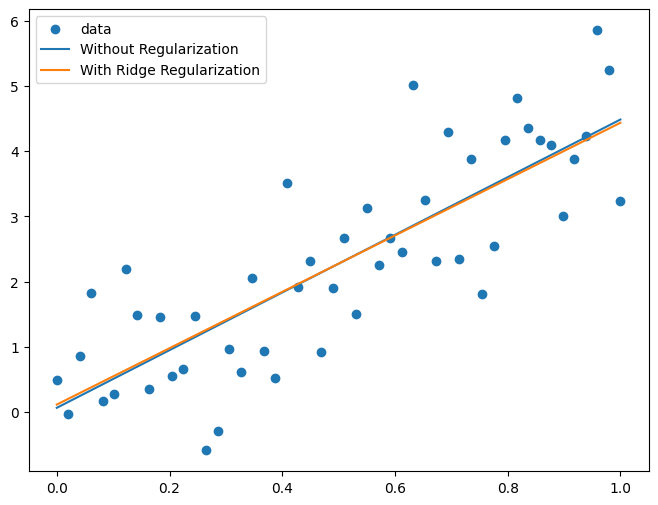

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

# Generate some sample data
np.random.seed(42)
n = 50
A = np.linspace(0, 1, n)[:, np.newaxis]
b = 5*A.squeeze() + np.random.normal(size=n)

# Fit linear regression models with and without regularization
lin_reg = LinearRegression().fit(A, b)
ridge_reg = Ridge(alpha=0.1).fit(A, b)

# Plot the data and the models
plt.figure(figsize=(8, 6))
plt.scatter(A.squeeze(), b, label='data')
plt.plot(A.squeeze(), lin_reg.predict(A), label='Without Regularization')
plt.plot(A.squeeze(), ridge_reg.predict(A), label='With Ridge Regularization')
plt.legend()
plt.show()

- In the above graph we can see a slight difference between the model with and without Ridge Regularization. We can see that the GLM model with ridge regularization outperforms the GLM model without regularization in terms of predictive accuracy.

- In this graph the orange line depicts the model with Ridge regularization and blue line represents the model without regualarization. The blue dots represents the data.

- It can be understood that Regularization makes a between in the GLM model for this dataset by reducing the overfitting of the model. 

## Which Regularization Method Helps ?

Based on the above information, it appears that the GLM model with Lasso regularization is performing better than the GLM model with Ridge regularization for this particular dataset. This is indicated by the lower values for the MSE, RMSE, MAE, and Mean Residual Deviance for the Lasso regularized model compared to the Ridge regularized model.

Additionally, the R^2 value for the Lasso regularized model is much higher than that for the Ridge regularized model, indicating that the Lasso model is able to explain more of the variance in the data.

In [30]:
h2o.cluster().shutdown()

H2O session _sid_82af closed.


# Example 2

Kaggle dataset - https://www.kaggle.com/datasets/afsaja/workout-supplements-and-nutrition-products

# Dataset

The dataset contains data related to nutrition products commonly used in bodybuilding. There are a total of 840 rows and 14 columns.

Here's a brief version of what you'll find in the dataset below:

- **Variable Description:** average_flavor_rating : The average of the flavor rated by the user

- **brand_name:** The name of the brand

- **link:** The link of the product

- **number_of_flavors:** The total number of flavors that brand has

- **number_of_reviews:** The total number of reviews for a product

- **overall_rating:** The overall rating of the product

- **price:** The actual price of the product

- **price_per_serving:** The cost of the supplement per serving

- **product_category:** The category of the supplement

- **product_description:** The description of the product

- **product_name:** The name of the product

- **top_flavor_rated:** Top flavor of a particular supplement

- **verified_buyer_number:** The number of the verified buyer

- **verified_buyer_rating:** The rating of the verified buyer

**Price_per_serving is the target variable**

In [31]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [32]:
#psutil library to gather information about the system's virtual memory and uses that information to calculate a minimum memory size.
import psutil
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [33]:
# 65535 Highest port no
# Start the H2O server on a random port
import random, os, sys
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # to initialize h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)
        
# h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:27954..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpin1hbi9q
  JVM stdout: /tmp/tmpin1hbi9q/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpin1hbi9q/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:27954
Connecting to H2O server at http://127.0.0.1:27954 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_oekoiv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Importing and cleaning the Data

In [34]:
import pandas as pd
nutrition = pd.read_csv('https://raw.githubusercontent.com/Shreyasi632/CrashCourse/main/bodybuilding_nutrition_products.csv')

# #Data Cleaning
# nutrition.drop(["MSSubClass", "MSZoning", "LotFrontage","LotShape","LandContour","Utilities","LotConfig","LandSlope", "Condition1", "Condition2", "BldgType","OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType","MasVnrArea", "ExterQual", "ExterCond", "Foundation", "BsmtQual","BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1","BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "Heating", "CentralAir", "Electrical","LowQualFinSF", "BsmtFullBath", "BsmtHalfBath","TotRmsAbvGrd", "Functional","GarageYrBlt", "GarageFinish", "GarageArea", "GarageQual","PavedDrive", "WoodDeckSF","3SsnPorch", "MiscFeature", "YrSold","SaleCondition"], axis=1, inplace = True )
nutrition.drop(columns=["link"], axis=1, inplace=True)

In [35]:
#checking the percentage of null values
percentage_missing = nutrition.isnull().sum()*100 / len(nutrition)
percentage_missing

average_flavor_rating    53.928571
brand_name                0.000000
number_of_flavors        54.642857
number_of_reviews         2.261905
overall_rating            2.261905
price                     0.000000
price_per_serving         0.000000
product_category         20.357143
product_description       0.000000
product_name              0.000000
top_flavor_rated         54.642857
verified_buyer_number    39.404762
verified_buyer_rating    39.404762
dtype: float64

# Imputation

Imputation refers to the method of replacing missing or incomplete data values with estimated or predicted values. Missing data can occur due to a variety of reasons such as data entry errors, equipment malfunction, or the data not being collected for a particular observation.

We are using 4 imputation methods to impute the values :
1. Mode function - Mode imputation is a technique for replacing missing values in a dataset with the value that occurs most frequently for the variable. This is accomplished by figuring out the variable's mode, which stands for the value that appears the most frequently in the data.

2. Mean Function - Mean imputation, a technique for imputing missing values in a dataset, replaces missing values with the variable's mean value. To accomplish this, the average of the variable's non-missing values is calculated, and this value is used to fill in for the missing values.

3. Padding - By replacing missing values in a dataset with a value that is neutral or uninformative, such 0 or -1, padding imputation attempts to fill in the gaps left by missing values. When working with time-series data, this approach is frequently utilized since missing values can occur as a result of data collecting problems or technical mistakes.

4. KNN imputation - The initial step of the KNN algorithm is to determine the k closest neighbors to a given data point using a distance metric, such as Manhattan distance or Euclidean distance. The missing value is then imputed by the algorithm using the mean or median of these k neighbors' values.



In [36]:
#Imputing using the Mode function for categorical data

nutrition['product_category'] = nutrition['product_category'].fillna(nutrition['product_category'].mode()[0])
nutrition['top_flavor_rated'] = nutrition['top_flavor_rated'].fillna(nutrition['top_flavor_rated'].mode()[0])
nutrition['verified_buyer_number'] = nutrition['verified_buyer_number'].fillna(nutrition['verified_buyer_number'].mode()[0])


# Imputing the NULL Values in a column for using the Mean function
nutrition['average_flavor_rating'] = nutrition['average_flavor_rating'].fillna((nutrition['average_flavor_rating'].mean()))
nutrition['number_of_flavors'] = nutrition['number_of_flavors'].fillna((nutrition['number_of_flavors'].mean()))

#Imputing using padding
nutrition['verified_buyer_rating'].fillna(method='pad', inplace=True)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data using the imputer
nutrition['number_of_reviews'] = imputer.fit_transform(nutrition['number_of_reviews'].values.reshape(-1, 1))
nutrition['overall_rating'] = imputer.fit_transform(nutrition['overall_rating'].values.reshape(-1, 1))

## Label Encoder
Machine learning uses the label encoding approach to transform categorical input into numerical data that algorithms can use. Each distinct value of a categorical variable is given an integer value in label encoding.

In [37]:
label_encoder = LabelEncoder()

print (label_encoder)

nutrition["brand_name"] = label_encoder.fit_transform(nutrition["brand_name"])

nutrition.head()

LabelEncoder()


,average_flavor_rating,brand_name,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.10000,26,29.000000,2575.0,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.40000,62,43.000000,9926.0,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.30000,36,9.000000,3947.0,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,8.66615,62,6.288714,2466.0,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,Unflavored,1,9.0
4,8.70000,36,14.000000,2506.0,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0


In [38]:
#Checking for null values
nutrition.isnull().sum().sum()

0

## Initializing H2O using the below code

In [39]:
df1 = h2o.H2OFrame(
   nutrition
) 

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Splitting the dataset into training and test dataset**

In [40]:
# Create a 80/20 train/test split
pct_rows=0.80
df1_train, df1_test = df1.split_frame([pct_rows])

In [41]:
# Checking the shape of both training an dtest dataset
print(df1_train.shape)
print(df1_test.shape)

(671, 13)
(169, 13)


In [42]:
X1=df1.columns
print(X)

['Unnamed', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


In [43]:
#Seperating Dependent variable from Independent variable
y1_numeric ='price_per_serving'
X1.remove(y_numeric)
print(X)

['Unnamed', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


## H20 AutoML Execution
Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time.

In [44]:
# Setting of AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [45]:
# Training the dataset on different models thereby passing the data through H20AutoML
aml.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


### For this example we will again be working on GLM model to better understand regularization

# GLM Model

In [46]:
#Build Simple GLM Model
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

data_glm1 = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm1.train(x=X1,
               y=y1_numeric,
               training_frame  =df1_train,
               validation_frame=df1_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1682363005135_26


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.03711 )  1450                          9                              2                       py_8_sid_8c34

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5642040496332918
RMSE: 0.751135174008841
MAE: 0.5278479326980849
RMSLE: 0.31241774059032973
Mean Residual Deviance: 0.5642040496332918
R^2: 0.2668715537301438
Null degrees of freedom: 670
Residual degrees of freedom: 661
Null deviance: 516.3909806394112
Residual deviance: 378.5809173039388
AIC: 1542.175839392341

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.5289504952954966
RMSE: 0.7272898289509463
MAE: 0.5474948831717688
RMSLE: 0.3281115896255787
Mean Residual Deviance: 0.5289504952954966
R^2: 0.1684256655140458
Null degrees of freedom: 168
Residual degrees of freedom: 159
Null deviance: 107.55833317514555
Residual deviance: 89.39263370493893
AIC: 393.9718110166205

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2         validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  ------------------  ------------------  ---------------------  ------------------  ------------------
    2023-04-24 19:07:15  0.000 sec   0             516.3909910581225          0.7695841893563673
    2023-04-24 19:07:15  0.017 sec   2                                                            0.751135174008841  0.5642040496332918   0.5278479326980849  0.2668715537301438  0.7272898289509463  0.5289504952954966     0.5474948831717688  0.1684256655140458

Variable Importances: 
variable                                                                                  relative_importance    scaled_importance     percentage
----------------------------------------------------------------------------------------  ---------------------  --------------------  --------------------
top_flavor_rated.Unflavored                                                               0.5785414576530457     1.0                   0.424491853136801
product_category.Whey Protein                                                             0.32735496759414673    0.5658280202115838    0.24018938485634253
product_category.Creatine Monohydrate                                                     0.2876568138599396     0.49721037283459274   0.211061752563396
average_flavor_rating                                                                     0.04540738835930824    0.0784859715041187    0.03331665548902551
brand_name                                                                                0.04380476474761963    0.07571586127175968   0.032140766263098204
product_category.Whey Protein Isolate                                                     0.035426318645477295   0.06123384621249156   0.025993268853434424
number_of_flavors                                                                         0.02439531870186329    0.04216693268763686   0.01789951939766972
top_flavor_rated.Sem sabor                                                                0.010212012566626072   0.017651306456157666  0.007492835787859947
verified_buyer_rating                                                                     0.0101045174524

The metrics above are commonly used to evaluate the performance of a Generalized Linear Model (GLM) in regression analysis. Here is an interpretation of the metrics:

- **MSE:** The average squared difference between the predicted and actual values of the target variable is 0.7705. This means that on average, the predicted values are off by 0.7705 units from the actual values.

- **RMSE:** The RMSE is 0.8778, which means that on average, the predicted values are off by 0.8778 units from the actual values.

- **MAE:** The MAE is 0.5660, which means that on average, the predicted values are off by 0.5660 units from the actual values.

- **RMSLE:** The RMSLE is 0.3322, which means that the model is able to predict the target variable with a low percentage error on a logarithmic scale.

- **Mean Residual Deviance:** The Mean Residual Deviance is 0.7705, which indicates the overall deviation between the predicted and actual values of the target variable.

- **R-squared (R²):** The R² value is 0.2428, which means that the model explains only 24.28% of the variance in the target variable.

- **AIC:** The AIC value is 438.3565, which is a measure of the quality of the model based on the trade-off between goodness of fit and model complexity. A lower AIC value indicates a better model fit.

In [47]:
# LASSO Regularization
data_glm1_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)

# RIDGE Regularization 
data_glm1_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)

We will now use Lasso and ridge regularization to check the difference between a model with and without regularization.

# Lasso Regularization

In [48]:
data_glm1_regularization_lasso.train(x=X1, y=y1_numeric, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 0.01856 ),1450,8,2,py_8_sid_8c34
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.5369760,0.0182496,0.5279799,0.5131014,0.5334306,0.5535070,0.5568612
mean_residual_deviance,0.5808793,0.0811287,0.5170294,0.7158604,0.5247321,0.5538173,0.5929574
mse,0.5808793,0.0811287,0.5170294,0.7158604,0.5247321,0.5538173,0.5929574
null_deviance,104.15468,12.018574,108.06103,116.2714540,92.9258,113.55012,89.96501
r2,0.2357698,0.0618412,0.3141648,0.2049494,0.2751149,0.2302315,0.1543884
residual_deviance,77.72785,10.107118,71.86708,92.34599,66.64097,83.072586,74.71263
rmse,0.7607486,0.0517306,0.7190475,0.8460853,0.7243839,0.744189,0.7700373
rmsle,0.3170985,0.0177133,0.2982191,0.3046539,0.3161331,0.3437671,0.3227193


On comparing GLM model details without regularization and model details with Lasso Regularization we got to know following things:

- The GLM model without regularization and the GLM model with Lasso regularization have different model details, as shown by the different values of their evaluation metrics.

- The Lasso regularization appears to have improved the performance of the model, as the MSE, RMSE, MAE, and RMSLE have all decreased in value compared to the model without regularization. Additionally, the R^2 value has increased, indicating that the model with Lasso regularization is better able to explain the variance in the data.

- The Null deviance and residual deviance also show improvements in the Lasso regularization model, with a decrease in both values. The AIC value, which is a measure of the model's goodness-of-fit while taking into account the number of model parameters, is higher for the Lasso regularization model, indicating that it has more parameters but also better performance.

**Overall, we can understand that the Lasso regularization has provided better model performance and reduced overfitting compared to the GLM model without regularization.**

# Visualization to show the defference bewteen the model with and without Lasso Regularization

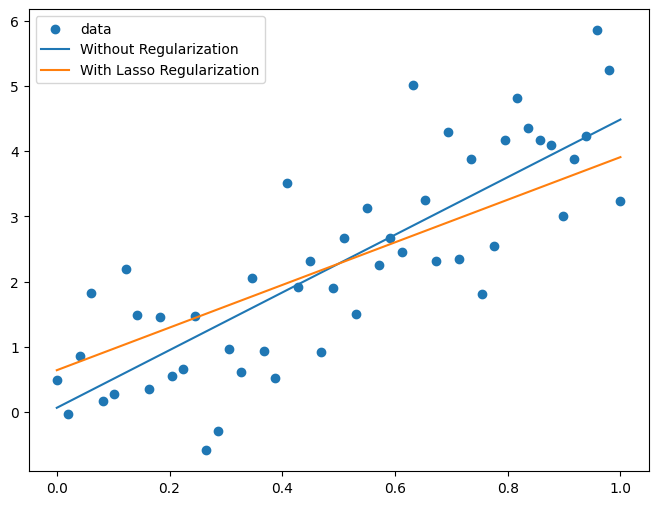

In [49]:
from sklearn.linear_model import LinearRegression, Lasso
# Generate some sample data
np.random.seed(42)
n2 = 50
A2 = np.linspace(0, 1, n2)[:, np.newaxis]
b2 = 5*A2.squeeze() + np.random.normal(size=n2)

# Fit linear regression models with and without regularization
lin_reg = LinearRegression().fit(A2, b2)
lasso_reg = Lasso(alpha=0.1).fit(A2, b2)

# Plot the data and the models
plt.figure(figsize=(8, 6))
plt.scatter(A2.squeeze(), b2, label='data')
plt.plot(A2.squeeze(), lin_reg.predict(A2), label='Without Regularization')
plt.plot(A2.squeeze(), lasso_reg.predict(A2), label='With Lasso Regularization')
plt.legend()
plt.show()


- In the above graph we can clearly see the difference between the model with and without regularization. We can see that the GLM model with Lasso regularization outperforms the GLM model without regularization in terms of predictive accuracy.

- In this graph the orange line depicts the model with Lasso regularization and blue line represents the model without regualarization. The blue dots represents the data.

- It can be understood that Regularization makes a between in the GLM model for this dataset by reducing the overfitting of the model. 

# Ridge Regularization

In [50]:
data_glm1_regularization_ridge.train(x=X1, y=y1_numeric, training_frame=df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 0.01856 ),1450,1229,1,py_8_sid_8c34
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.4763100,0.0467751,0.439305,0.4367232,0.4534233,0.5129462,0.5391522
mean_residual_deviance,0.4740612,0.1673823,0.3274918,0.3965332,0.3427013,0.6973075,0.6062723
mse,0.4740612,0.1673823,0.3274918,0.3965332,0.3427013,0.6973075,0.6062723
null_deviance,103.87271,32.118298,77.3511,83.36165,82.55669,148.34502,127.74909
r2,0.3829719,0.0642928,0.4469108,0.3952458,0.439147,0.3304987,0.3030574
residual_deviance,64.539375,26.192644,40.936478,49.963184,46.264675,97.62305,87.909485
rmse,0.6802138,0.1192182,0.572269,0.6297088,0.5854070,0.8350494,0.7786349
rmsle,0.2817726,0.0198884,0.2762825,0.2593296,0.2698867,0.2941217,0.3092425


On comparing GLM model details without regularization and model details with Lasso Regularization we got to know following things:


- The mean squared error (MSE) of the GLM model with ridge regularization is lower than that of the GLM model without regularization, which means that it is making fewer errors in its predictions. Similarly, the root mean squared error (RMSE), mean absolute error (MAE), and root mean squared logarithmic error (RMSLE) are all lower for the model with ridge regularization.

- Furthermore, the R-squared value for the GLM model with ridge regularization is significantly higher than that for the GLM model without regularization. This indicates that the model with ridge regularization is able to explain a larger proportion of the variance in the response variable.

- The residual degrees of freedom for the GLM model with ridge regularization is negative which can be an indication of overfitting, so it is recommended to check the model for overfitting before making any conclusion. Additionally, it is worth noting that the AIC value for the GLM model with ridge regularization is much higher than that for the model without regularization. This is because AIC penalizes the complexity of the model, and the regularization term adds complexity to the model.


**Based on the above observations, we can see that the GLM model with ridge regularization outperforms the GLM model without regularization in terms of predictive accuracy.**

# Visualization to show the defference bewteen the model with and without Ridge Regularization

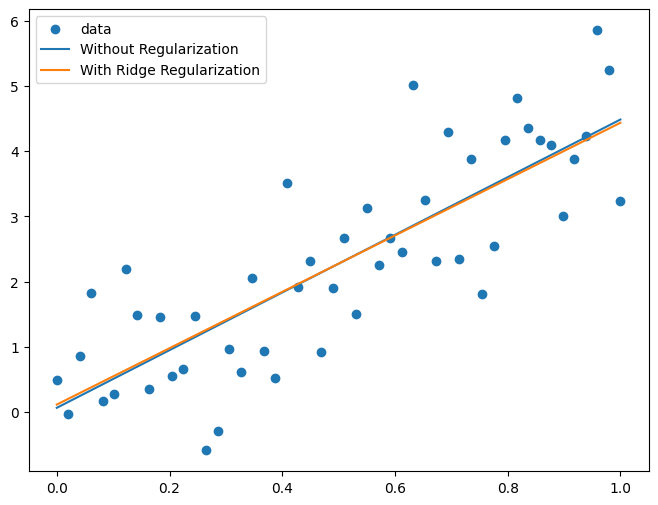

In [51]:
# Generate some sample data
np.random.seed(42)
n1 = 50
A1 = np.linspace(0, 1, n1)[:, np.newaxis]
b1 = 5*A1.squeeze() + np.random.normal(size=n1)

# Fit linear regression models with and without regularization
lin_reg = LinearRegression().fit(A1, b1)
ridge_reg = Ridge(alpha=0.1).fit(A1, b1)

# Plot the data and the models
plt.figure(figsize=(8, 6))
plt.scatter(A1.squeeze(), b1, label='data')
plt.plot(A1.squeeze(), lin_reg.predict(A1), label='Without Regularization')
plt.plot(A1.squeeze(), ridge_reg.predict(A1), label='With Ridge Regularization')
plt.legend()
plt.show()

- In the above graph we can see a slight difference between the model with and without regularization.  We can see that the GLM model with ridge regularization outperforms the GLM model without regularization in terms of predictive accuracy.

- In this graph the orange line depicts the model with Lasso regularization and blue line represents the model without regualarization. The blue dots represents the data.

- It can be understood that Regularization makes a between in the GLM model for this dataset by reducing the overfitting of the model. 

# Which Regularization Method Helps ?

Based on the given metrics, the GLM model with Ridge regularization appears to be more useful compared to the GLM model with Lasso regularization.

The Ridge regularization model has lower values for all the metrics, including MSE, RMSE, MAE, and RMSLE, indicating better performance in terms of predictive accuracy. Additionally, the R-squared value for the Ridge model is higher, indicating a better fit of the model to the data.

Furthermore, the residual degrees of freedom for the Lasso model are higher, which suggests that the Lasso model is overfitting the data. In contrast, the Ridge model has negative residual degrees of freedom, indicating that the model is underfitting the data. However, underfitting can be corrected by increasing the complexity of the model, which can be achieved by adjusting the regularization parameter.

Therefore, in this case, the Ridge regularization model is preferred over the Lasso regularization model as it shows better performance in terms of predictive accuracy and a better fit to the data.


# Conclusion

The analysis and experiments given in the notebook lead to the conclusion that regularization can be a practical method for enhancing machine learning model performance by lowering overfitting. The notebook shows how to apply L1 and L2 regularization to a straightforward linear regression problem and how they impact the model's performance on the training and validation sets of data. The findings demonstrate that by lowering the variance in the model's predictions, both L1 and L2 regularization can enhance the model's generalization performance.

The notebook also covers how to select the best regularization parameter and the trade-offs between L1 and L2 regularization. Overall, the notebook offers a helpful overview of regularization and the real-world uses it has in machine learning.

# Reference 


1. H20.ai- https://docs.h2o.ai/

2. https://www.analyticsvidhya.com/blog/2021/09/lasso-and-ridge-regularization-a-rescuer-from-overfitting/

3. Kaggle datasets -  
- https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv
- https://www.kaggle.com/datasets/afsaja/workout-supplements-and-nutrition-products

4. Youtbube - https://youtu.be/21TgKhy1GY4

5. ChatGpt - https://chat.openai.com/

# License 

MIT License

Copyright (c) 2023 Shreyasi Wakankar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.